In [1]:
!pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 16.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 4.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.1/318.1 kB 19.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 145.0/145.0 kB 16.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 37.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 4.1 MB/s eta

In [2]:
!pip install scikit-learn

In [3]:
import tensorflow as tf
import gradio as gr
import numpy as np
import pandas as pd
from tensorflow.keras import layers, models
from matplotlib import pyplot as plt
from sklearn.metrics import r2_score

In [4]:
from google.colab import drive

In [5]:
# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:

# Load a time series dataset (for example, stock prices)
# For this example, we'll create a synthetic time series dataset
data = np.sin(np.linspace(0, 100, 1000))  # Sine wave data as an example
sequence_length = 50

In [7]:
# Prepare the dataset
def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data) - seq_length):
        x = data[i:i+seq_length]
        y = data[i+seq_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

X, y = create_sequences(data, sequence_length)

In [8]:
# Split the data into training, validation, and test sets
split1 = int(0.8 * len(X))
split2 = int(0.9 * len(X))

X_train, y_train = X[:split1], y[:split1]
X_val, y_val = X[split1:split2], y[split1:split2]
X_test, y_test = X[split2:], y[split2:]

In [9]:
# Reshape data for LSTM [samples, time steps, features]
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_val = X_val.reshape((X_val.shape[0], X_val.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [10]:
# Model creation and training
input_shape = (sequence_length, 1)

model = models.Sequential([
    layers.LSTM(64, activation='relu', input_shape=input_shape, return_sequences=True),
    layers.LSTM(64, activation='relu'),
    layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse')

In [11]:
# Training
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val))


Epoch 1/20
24/24 [==============================] - 5s 97ms/step - loss: 2.1789 - val_loss: 0.1364
Epoch 2/20
24/24 [==============================] - 2s 79ms/step - loss: 0.2553 - val_loss: 0.2978
Epoch 3/20
24/24 [==============================] - 2s 90ms/step - loss: 0.2919 - val_loss: 0.2851
Epoch 4/20
24/24 [==============================] - 2s 87ms/step - loss: 0.2661 - val_loss: 0.2183
Epoch 5/20
24/24 [==============================] - 2s 83ms/step - loss: 0.1865 - val_loss: 0.0448
Epoch 6/20
24/24 [==============================] - 1s 52ms/step - loss: 0.0959 - val_loss: 0.0672
Epoch 7/20
24/24 [==============================] - 1s 51ms/step - loss: 0.0379 - val_loss: 0.0097
Epoch 8/20
24/24 [==============================] - 1s 62ms/step - loss: 0.0072 - val_loss: 0.0040
Epoch 9/20
24/24 [==============================] - 2s 63ms/step - loss: 0.0021 - val_loss: 6.4773e-04
Epoch 10/20
24/24 [==============================] - 1s 52ms/step - loss: 4.7016e-04 - val_loss: 2.1441e-

In [12]:
# Save the model to Google Drive
model.save('/content/drive/My Drive/LSTM_Model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [13]:
# Model Evaluation
loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')

3/3 [==============================] - 0s 20ms/step - loss: 4.3695e-05
Test Loss: 4.369474481791258e-05


In [14]:
# R-squared value
predicted = model.predict(X_test)
r2 = r2_score(y_test, predicted)
print(f'R-squared: {r2}')

3/3 [==============================] - 0s 17ms/step
R-squared: 0.9999059549459828


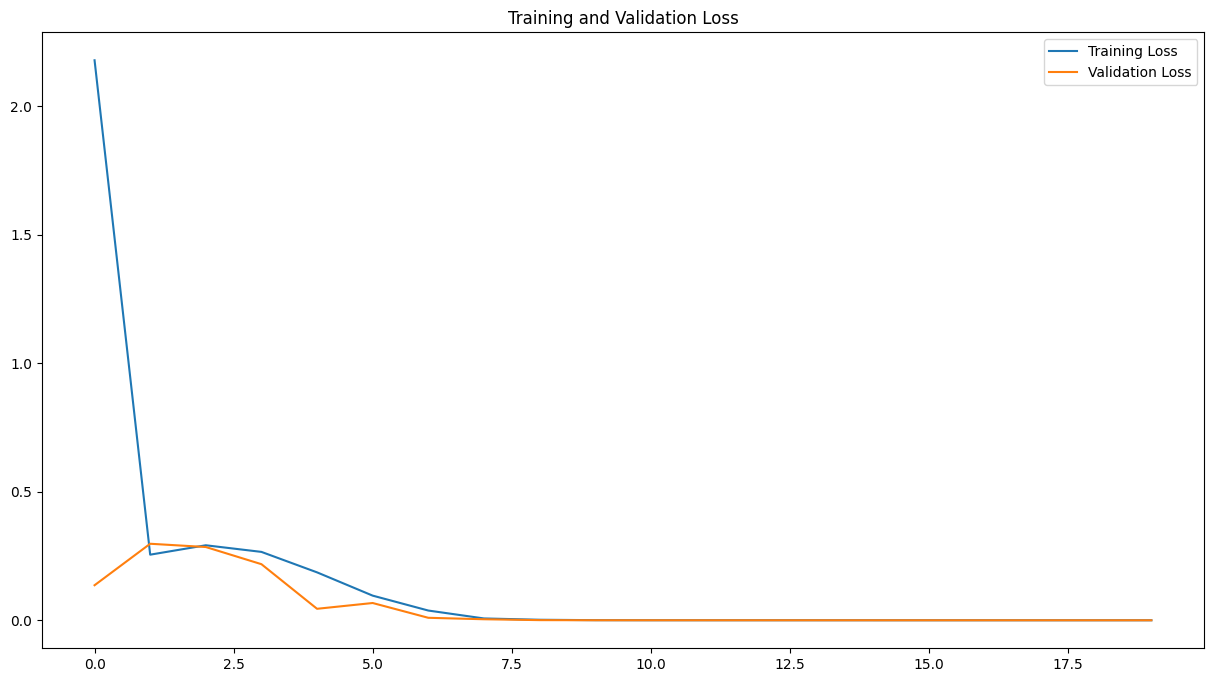

In [15]:
# Plotting the training and validation loss
epochs_range = range(20)
train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(15, 8))
plt.plot(epochs_range, train_loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

3/3 [==============================] - 0s 25ms/step


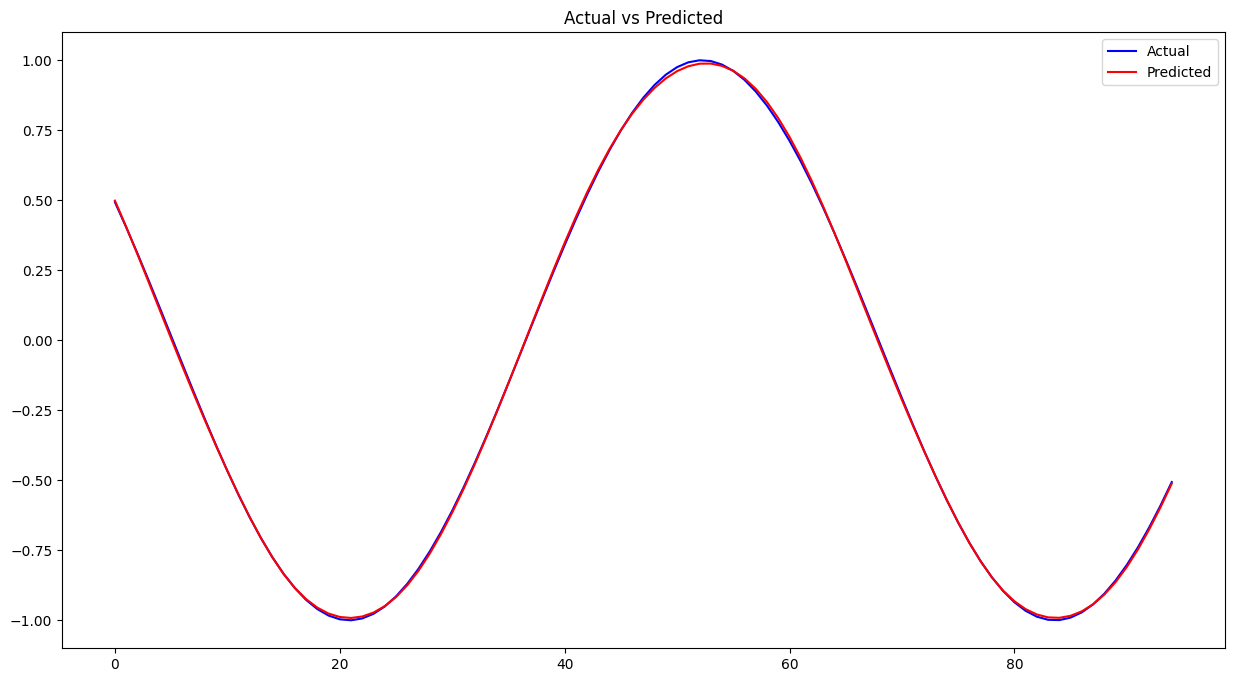

In [16]:
# Prediction
predicted = model.predict(X_test)

plt.figure(figsize=(15, 8))

# Plot the actual values
plt.plot(y_test, label='Actual', color='blue')

# Plot the predicted values
plt.plot(predicted, label='Predicted', color='red')

plt.legend(loc='upper right')
plt.title('Actual vs Predicted')
plt.show()